# Assignment 1 Image Processing

### Submitted by:  Nitin Kandpal 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2

#### Writing function to calculate the histogram of gray scale image with given number of bins 

Function histogram:
inputs : gray_image, number_of_bins and Norm = True or False
Outputs : histogram on image

In [2]:
def histogram(img_gray,number_of_bins,Norm):
    # initilizing the histogram bins
    histo = np.zeros([1,number_of_bins], dtype='int32')
    
    [row,col] = img_gray.shape
    
    for i in range(0,row):
        for j in range(0,col):
            value = img_gray[i,j]
            ## taking care the value accoring to bins
            value = int(round(value*(number_of_bins-1)/255))
            #print (value)
            histo[0,value] = histo[0,value]+1
    
    if(Norm==True):
        ## normalizing the histogram 
        histo = histo/((1.0)*row*col)
    
    
    return histo        
    

Check the histogram function and match with cv2 histogram 

(512, 512)


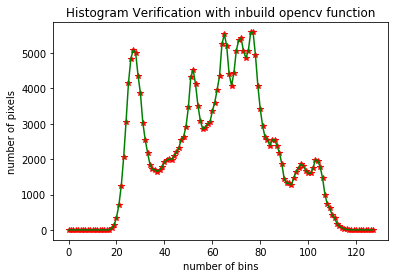

In [3]:
img = cv2.imread('../input_data/lena.bmp',0)
print (img.shape)

## CALLING HISTOGRAM FUCTION WE IMPLEMENTED
histo = (histogram(img,128,False))
#plt.plot(histo[0,:])

## CALING OPNECV INBUILT HISTOGRAM FUNCTION
cv2_hist = cv2.calcHist([img],[0],None,[128],[0,256])

## PLOTTING BOTH HISTOGRAM FOR VERIFICATION
plt.title("Histogram Verification with inbuild opencv function")
plt.xlabel("number of bins")
plt.ylabel("number of pixels")
plt.plot(cv2_hist,'r*',histo[0,:],'g')
plt.show()


In [4]:
#helper function which convvert the number 24 bit to 3  8 bits B G R values 

def conver_num_BGR(number):
    B,value = divmod(number, 256*256)
    G, R = divmod(value, 256)
    return B,G,R
    

#### Q1.1 The function domColors(im, k) takes an image im and an integer k and returns a list of k most frequently occurring colors


In [5]:
def domColors(img,k):
        channel = 0
     #check the image is gray or RGB
        if(len(img.shape)>2):
            
            rows,cols,channel = img.shape
        else:
            rows,cols = img.shape
            
        ## for RGB image     
        if(channel>2):
            
            ## calculate the histogram of each channel    
            img_b = img[:,:,0]
            histo_b = (histogram(img_b,256,False))
            img_g = img[:,:,1]
            histo_g = (histogram(img_g,256,False))  
            img_r = img[:,:,2]
            histo_r = (histogram(img_r,256,False))
                                   
            #create the a list array pixel_values (B,G,R) and number of pixels in B,G,R
            
            pixel_values = np.zeros([256,256,256],dtype = 'int32')
            #print(pixel_values.shape)
            #pixel_count = np.zeros([3*256,1],dtype = 'int32')
            count = []
            
            for l in range(0,256):
                for m in range(0,256):
                    for n in range(0,256):
                        #print (l,m,n)
                        pixel_values = (histo_b[0,l] + histo_g[0,m] + histo_r[0,n])
                        #pixel_values[l,m,n] = 5
                        count.append(pixel_values)
            
            ## got 1 D index
            flipeed_indx = np.argsort(count)
            # reverese decreasing oreder 
            index = np.flip(flipeed_indx,axis=0)
            color_list = []
            for p in range(k):
                color = conver_num_BGR(index[p])
                color_list.append(color)
                
            
            
            return color_list
        
        else:
            #print("Nitin")
            histo_gray = (histogram(img,256,False))
            flipeed_indx = np.argsort(histo_gray[0,:])
            index = np.flip(flipeed_indx,axis=0)
            color_list = []
            for p in range(k):
                color_list.append(index[p])
            
            
            
            
            return color_list
                         

In [6]:
img = cv2.imread('../input_data/rose.jpeg')
#Lets find the two most frequent color in rose image as we can predict its will be (0,0,0) and (0,0,255) while seeind the image
most_freq_color = domColors(img,2)
most_freq_color

[(0, 0, 0), (0, 0, 255)]

#### Q1.2 Implement a display function which takes the image im as input, the list returned by domColors(im, k) and displays the image, the most dominant color and the palette of k dominant colors


In [7]:
def disp_palette(img, freq_color):
    k = len(freq_color)
    
    # size of each pallete
    palette = np.zeros([20,20,3],'uint8')
    
    list_palette = np.zeros([20,20*k,3],'uint8')
    for i in range(k):
                
        ## saving the pallete 
        if(len(img.shape)>2):
            palette[:,:,0] = freq_color[i][0] 
            palette[:,:,1] = freq_color[i][1]
            palette[:,:,2] = freq_color[i][2]
            list_palette[:,i*20:i*20+20,:]=palette
        else:
            list_palette[:,i*20:i*20+20,:]=freq_color[i]
    
    
    
    fig=plt.figure(figsize=(8, 8))
    columns = 1
    rows = 2
    fig.add_subplot(rows, columns, 1)
    plt.axis("off")
    plt.title("input_image")
    plt.imshow(img)
    fig.add_subplot(rows, columns, 2)
    plt.axis("off")
    plt.title("pallete_image")
    plt.imshow(list_palette)
    
    
#w=10
#h=10
#fig=plt.figure(figsize=(8, 8))
#columns = 4
#rows = 5
#for i in range(1, columns*rows +1):
#    img = np.random.randint(10, size=(h,w))
#    fig.add_subplot(rows, columns, i)
#    plt.imshow(img)
#plt.show()
    
  
        

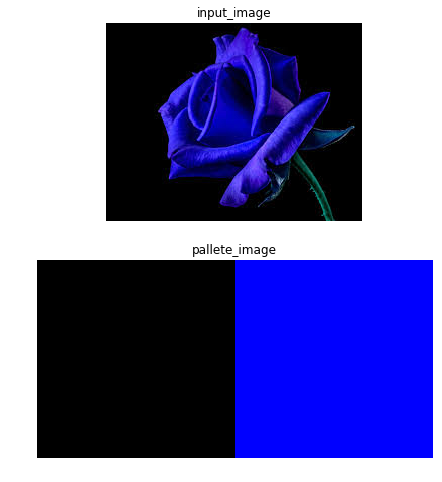

In [8]:
#Check the function disp_pallete i m reading the image form opnecv and displaying 
#it with Matplotlib so its swaping th BGR channel to RGB while dispaling
list_palette = disp_palette(img, most_freq_color)

#### Q 1.3 Answer :
domColorsfucntion can be use to segment out the object in image on the basis of most frequest colors. It might be used to extract color feature which can further apply to ML.     

####  Q2.1  Implement a function ChromaKey which takes two images fg,bg as input and RGB color keyColor corresponding to key color and outputs the chroma-keyed result

In [9]:
def ChomaKey(fg,bg ,key_color):
        channel = 0
        
        
     #check the image is gray or RGB
        if(len(bg.shape)>2):
            
            rows,cols,channel = bg.shape
        else:
            rows,cols = bg.shape
        
        out_image = np.zeros([rows,cols,channel],dtype='uint8')
        for i in range(rows):
            for j in range(cols):
                
                ## if fg color dont match exactly with key color replace the color 
                if(~((fg[i,j,0]==key_color[0]) & (fg[i,j,1]==key_color[1]) & (fg[i,j,2]== key_color[2]))):
                   
                    #print ("nitin")
                    out_image[i,j,0] = fg[i,j,0]
                    out_image[i,j,1] = fg[i,j,1]
                    out_image[i,j,2] = fg[i,j,2]
                    
                else:
                    out_image[i,j,0] = bg[i,j,0]
                    out_image[i,j,1] = bg[i,j,1]
                    out_image[i,j,2] = bg[i,j,2]
                    
        return out_image            
    
    

#### Q2.2 select the any backgound image and foreground rose image and show the output

(197, 255, 3)


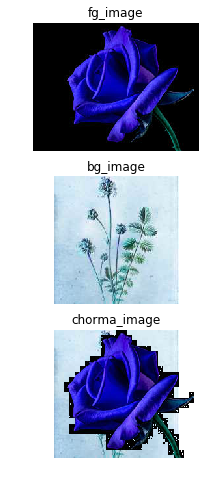

In [10]:
fg = cv2.imread('../input_data/rose.jpeg')
print(fg.shape)
key_color = [0,0,0]    ## BGR formate

bg = cv2.imread('../input_data/bg_image.jpeg')
## call the function 
chorma_image = ChomaKey(fg,bg ,key_color) 
fig=plt.figure(figsize=(8, 8))
columns = 1
rows = 3
fig.add_subplot(rows, columns, 1)
plt.axis("off")
plt.title("fg_image")
plt.imshow(fg)
fig.add_subplot(rows, columns, 2)
plt.axis("off")
plt.title("bg_image")
plt.imshow(bg)
fig.add_subplot(rows, columns, 3)
plt.axis("off")
plt.title("chorma_image")
plt.imshow(chorma_image)


#### Q2.3  show some results of chomakey functions 

(225, 225, 3)


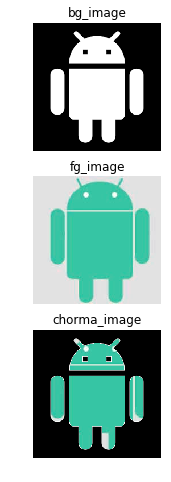

In [11]:
fg = cv2.imread('../input_data/fg_image.png')
print(fg.shape)
key_color = [255,255,255]    ## BGR formate

bg = cv2.imread('../input_data/background_image.jpeg')
## call the function 
chorma_image = ChomaKey(fg,bg ,key_color) 
fig=plt.figure(figsize=(8, 8))
columns = 1
rows = 3
fig.add_subplot(rows, columns, 1)
plt.axis("off")
plt.title("bg_image")
plt.imshow(fg)
fig.add_subplot(rows, columns, 2)
plt.axis("off")
plt.title("fg_image")
plt.imshow(bg)
fig.add_subplot(rows, columns, 3)
plt.axis("off")
plt.title("chorma_image")
plt.imshow(chorma_image)

#### Q3 .1 Write a function to implement a piecewise linear transform z 0 =  g(z) = K 1 i · z + K 2 i ; a i ≤ z ≤ b i . The function transformIntensity(im, K1, K2, a, b) takes an input image im, coefficients K1,K2 and intervals a,b for each linear segment and produces the transformed output image

In [12]:
def transformIntensity(img,K1,K2, a,b):
    
    
    rows,cols = img.shape
    
    out_img = np.zeros([rows,cols],dtype='int32')
    slop = 0
    for i in range(rows):
        for j in range(cols):
            value = img[i,j]/255.0

   #         if (value < a):
   #             out_img[i,j] = int(round(255.0*(K2)))
            if (value > a ) & (value < b):     
   #             out_img[i,j] = int(round(255.0*((K1* value)/(b-a) + K2)))
   #         else:
   #             out_img[i,j] = int(round(255.0*(K2)))
                out_img[i,j] = int(round(255.0*((K1* value)/(b-a) + K2)))
            
    return out_img
 
            
            
            
                
                
            
    
    

#### Q3.2 Write the analytical forms for the following transforms 
#### Ans  all values are normalized to 0 to 1 

#### graph1     Y = K2 + (K1 * pixel value)/ (b-a)  
         Y  = .25 + (0.75 * pix_value)/(0.75)   {for 0 < =  pix_value < = .75} K2 = .25, K1 =.75 a =0 ,b = .75
         Y  = 1 + 0                             {for pix_value > .75           K2 = 1, K1 =0 a =.75 ,b = 1  
            
           

#### graph2     Y = K2 + (K1 * pixel value)/ (b-a)  
         Y  =   0                                {for pix_value < = .25} K2 = 0, K1 =0 a =0 ,b = .25 
         Y  = - 0.25 + (1 * pix_value)/(0.75) {for pix_value > .25  } K2 = -0.25, K1 =1 a = .25 ,b = 1 
         


#### graph3     Y = K2 + (K1 * pixel value)/ (b-a)  
         Y  =   0                                 {for pix_value < = .25}    K2 = 0, K1 =0 a =0 ,b = .25
         Y  = - 0.25 + (1 * pix_value)/(0.5)      {for .25 < pix_value < 0.75} K2 = -0.25, K1 =1 a = .25 ,b = .75  
         Y  =   1                                 {for pix_value > 0.75}     K2 = 1, K1 =0 a = .75 ,b = 1 
         
#### graph4     Y = K2 + (K1 * pixel value)/ (b-a)  
         Y  =   0                                 {for pix_value < = .25}   K2 = 0, K1 =0 a =0 ,b = .25  
         Y  =   0 + (0.5 * pix_value)/(0.5)       {for .25 < pix_value < 0.75  }  K2 = 0, K1 =.5 a =.25 ,b = .75
         Y  =   0                                 {for pix_value > 0.75}       K2 = 0, K1 =0 a =.75 ,b = 1
         
#### graph5     Y = K2 + (K1 * pixel value)/ (b-a)  
         Y  =   .25  + 0                          {for pix_value < = .25}   K2 = .25, K1 =0 a =0 ,b = .25 
         Y  =   .50  + 0                          {for .25 < pix_value < 0.5  } K2 = .50, K1 =0 a =.25 ,b = .5 
         Y  =   .57  + 0                          {for .5 < pix_value < 0.75  }  K2 = .75, K1 =0 a =.5 ,b = .75 
         Y  =   1  + 0                            {for pix_value > 0.75}  K2 = 1, K1 =0 a =.75 ,b = 1 
         
         
         

In [51]:
## perfomr the intensity transform of given graphs equations from function transformIntensity(img,K1,K2, a,b)
img = cv2.imread('../input_data/lena.bmp',0)

## graph 1 have 2 segment 
img1 = transformIntensity(img,.75,.25, 0,.75)
img2 = transformIntensity(img,0,1,.75,1)
graph1_img = img1 + img2

## graph 1 have 2 segment
img1 = transformIntensity(img,0,0, 0,.25)
img2 = transformIntensity(img,1,-.25,.25,1)
graph2_img = img1 + img2

## graph 3 have 3 segment
img1 = transformIntensity(img,0,0, 0,.25)
img2 = transformIntensity(img,1,-.25,.25,.75)
img3 = transformIntensity(img,0,1,.75,1)
graph3_img = img1 + img2 + img3

## graph 4 have 3 segment
img1 = transformIntensity(img,0,0, 0,.25)
img2 = transformIntensity(img,.5,0,.25,.75)
img3 = transformIntensity(img,0,0,.75,1)
graph4_img = img1 + img2 + img3

## graph 5 have 4 segment
img1 = transformIntensity(img,0,.25, 0,.25)
img2 = transformIntensity(img,0,.5,.25,.5)
img3 = transformIntensity(img,0,.75,.5,.75)
img4 = transformIntensity(img,0,1,.75,1)
graph5_img = img1 + img2 + img3 + img4





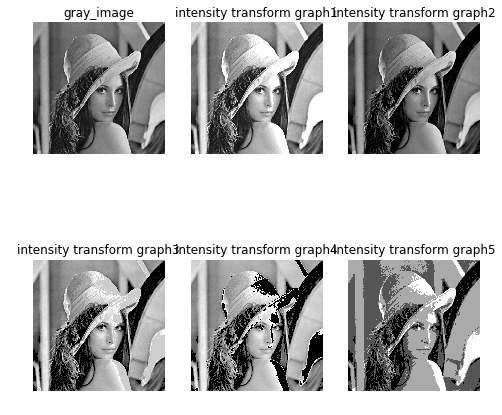

In [65]:
fig=plt.figure(figsize=(8, 8))
columns = 3
rows = 2
fig.add_subplot(rows, columns, 1)
plt.axis("off")
plt.title("gray_image")
plt.imshow(img,cmap='gray')
fig.add_subplot(rows, columns, 2)
plt.axis("off")
plt.title("intensity transform graph1")
plt.imshow(graph1_img,cmap='gray')

fig.add_subplot(rows, columns, 3)
plt.axis("off")
plt.title("intensity transform graph2")
plt.imshow(graph2_img,cmap='gray')

fig.add_subplot(rows, columns, 4)
plt.axis("off")
plt.title("intensity transform graph3")
plt.imshow(graph3_img,cmap='gray')

fig.add_subplot(rows, columns, 5)
plt.axis("off")
plt.title("intensity transform graph4")
plt.imshow(graph4_img,cmap='gray')

fig.add_subplot(rows, columns, 6)
plt.axis("off")
plt.title("intensity transform graph5")
plt.imshow(graph5_img,cmap='gray')


#### Q4.1 Write the code of histogram.

Histogram code is already wrote as helper function for solution1 copying same code below 

In [14]:
def histogram_1(img_gray,number_of_bins,Norm):
    # initilizing the histogram bins
    histo = np.zeros([1,number_of_bins], dtype='int32')
    
    [row,col] = img_gray.shape
    
    for i in range(0,row):
        for j in range(0,col):
            value = img_gray[i,j]
            ## taking care the value accoring to bins
            value = int(round(value*(number_of_bins-1)/255))
            #print (value)
            histo[0,value] = histo[0,value]+1
    
    if(Norm==True):
        ## normalizing the histogram 
        histo = histo/((1.0)*row*col)
    
    
    return histo        
    

#### Q4.2 Make an observation table noting how many bytes are required to store histogram representation and to store the raw image (pixels) for these sizes of lena image : (16x16, 32x32, 64x64, 128x128, 256x256).


In [15]:
## writing helper function which takes image as input with factor, downsample it and calculate histogram and normalize histogram 
## and return size of varibales in bytes
import sys
def downsample_img(img,factor):
    
    m= -1
    [rows,cols] = img.shape
    img_d = np.zeros([round(rows/factor),round(cols/factor)],dtype='uint8')
    for i in range (0,rows,factor):
        n=0
        m = m+1
        for j in range(0,cols,factor):
            
            img_d[m,n] = img[i,j]
            n=n+1
    
    #print (img.shape)
    #print (img_d.shape)            
    histo_N=histogram_1(img_d,256,True)
    
    out_feature =  img_d.shape, sys.getsizeof(img_d),sys.getsizeof(histo_N[0,:])
    return out_feature

In [16]:

## read the lina image 
img = cv2.imread('../input_data/lena.bmp',0)

Downsamplefactor  = [2,4,8,16,32]

table = {}

for factor in Downsamplefactor:
    out_feature = downsample_img(img,factor)
    print ('image_shape = ', out_feature[0], 'image_size(bytes) = ', out_feature[1],'Histo_size(bytes) = ', out_feature[2])
    


image_shape =  (256, 256) image_size(bytes) =  65648 Histo_size(bytes) =  96
image_shape =  (128, 128) image_size(bytes) =  16496 Histo_size(bytes) =  96
image_shape =  (64, 64) image_size(bytes) =  4208 Histo_size(bytes) =  96
image_shape =  (32, 32) image_size(bytes) =  1136 Histo_size(bytes) =  96
image_shape =  (16, 16) image_size(bytes) =  368 Histo_size(bytes) =  96


From above result we can observe that histogram of images take much less space as compared to store images. 
Less space is needed for low resolution images. To store 256 bin histogram space is usually 96 bytes

#### Q5.1 Histogram Equalization - (Images - hist-equal.jpg and hist-equal2.jpg)

In [17]:
def hist_equa(img):
    [rows,cols] = img.shape
    
    out_img = np.zeros([rows,cols],dtype='int32')
    ## calculate the histogram from the function we implemented.
    histo = histogram_1(img,256,True)
    ## calculate the cdf of histogram 
    cdf = np.zeros([1,256], dtype='float')
    temp_cdf = 0
    
    for k in range(0,256):
        
        temp = histo[0,k]
        temp_cdf = temp_cdf+temp
        cdf[0,k] = temp_cdf
    
    
    #Area = rows*cols
    Dm = 255.0
    
    for i in range(rows):
        for j in range(cols):
            value = img[i,j]
            #out_img[i,j] = int((Dm/Area)*cdf[0,value])
            out_img[i,j] = int(Dm* cdf[0,value])
            
            
    
    
    return out_img,cdf


    
    

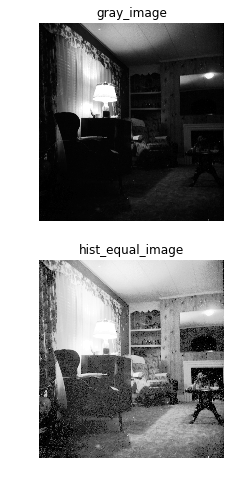

In [18]:
## read the image 
img = cv2.imread('../input_data/hist_equal.jpg',0)
img_equa,cdf1 = hist_equa(img)
fig=plt.figure(figsize=(8, 8))
columns = 1
rows = 2
fig.add_subplot(rows, columns, 1)
plt.axis("off")
plt.title("gray_image")
plt.imshow(img,cmap='gray')
fig.add_subplot(rows, columns, 2)
plt.axis("off")
plt.title("hist_equal_image")
plt.imshow(img_equa,cmap='gray')


## show the result in one more image


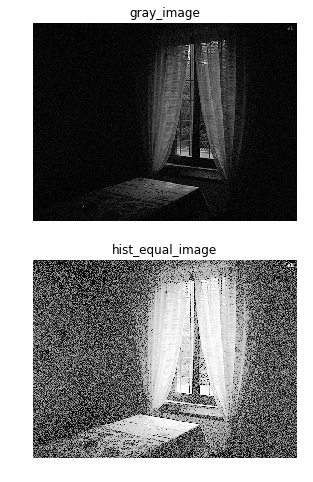

In [19]:
## Performing histogram in second image
img = cv2.imread('../input_data/hist_equal2.jpg',0)
img_equa,cdf1 = hist_equa(img)
fig=plt.figure(figsize=(8, 8))
columns = 1
rows = 2
fig.add_subplot(rows, columns, 1)
plt.axis("off")
plt.title("gray_image")
plt.imshow(img,cmap='gray')
fig.add_subplot(rows, columns, 2)
plt.axis("off")
plt.title("hist_equal_image")
plt.imshow(img_equa,cmap='gray')

#### Q5.b Local Histogram Equalization 

In [20]:
import math
def local_Histo_Equali(img,window_size):
    
    [rows,cols] = img.shape
    out_img = np.zeros([rows,cols],dtype='int32')
    
    PadM=math.floor((window_size[0])/2)
    PadN=math.floor((window_size[1])/2)
    pad_img = []
    ##FIND THE NUMBER OF ROWS AND COLUMNS TO BE PADDED WITH ZERO

    #print (PadM,PadN)
    pad_img = np.pad(img,[PadM,PadN],'constant', constant_values=(0, 0))
    [rows1,cols1] = pad_img.shape
    #print (pad_img.shape)
    
    for i in range(PadM,rows1-PadM):
        for j in range(PadN,cols1-PadN):
            
            # get the PadMxPadN windows
            window = pad_img[i-PadM:i+PadM+1,j-PadN:j+PadN+1] 
            ## apply the histogram localization in window image 
            #window,cdf = hist_equa(window)
            histo = histogram_1(window,256,True)
            cdf = np.zeros([1,256], dtype='float')
            temp_cdf = 0
    
            for k in range(0,256):
        
                temp = histo[0,k]
                temp_cdf = temp_cdf+temp
                cdf[0,k] = temp_cdf
            
            
            value = pad_img[i,j]

            
            out_img[i-PadM,j-PadN] = (int(255*cdf[0,value]))
            #print (int(255*cdf[0,value]))
            #out_img[i,j] = int(window[PadM,PadN])
            #print(int(cdf[0,value]*255.0))
    return out_img

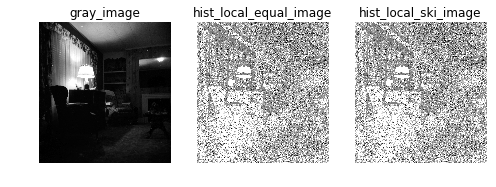

In [21]:
img = cv2.imread('../input_data/hist_equal.jpg',0)
hist_loc_img = local_Histo_Equali(img,(3,3))
fig=plt.figure(figsize=(8, 8))
columns = 3
rows = 1
fig.add_subplot(rows, columns, 1)
plt.axis("off")
plt.title("gray_image")
plt.imshow(img,cmap='gray')
fig.add_subplot(rows, columns, 2)
plt.axis("off")
plt.title("hist_local_equal_image")
plt.imshow(hist_loc_img,cmap='gray')


from skimage import data
from skimage.util import img_as_ubyte
from skimage import exposure
import skimage.morphology as morp
from skimage.filters import rank
kernel = np.ones((3,3))
img_ski = rank.equalize(img, selem=kernel)
fig.add_subplot(rows, columns, 3)
plt.axis("off")
plt.title("hist_local_ski_image")
plt.imshow(img_ski,cmap='gray')

### show the result in one more image


### Above is result of implemented local hitogram equalization vs Ski-image equalization (spended full day to figure out bug in my code because result was so bad in image and found that there is no bug when compare the result with skiimage)

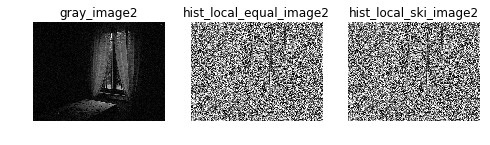

In [22]:
## Performing histogram in second image 
img = cv2.imread('../input_data/hist_equal2.jpg',0)
hist_loc_img = local_Histo_Equali(img,(3,3))
fig=plt.figure(figsize=(8, 8))
columns = 3
rows = 1
fig.add_subplot(rows, columns, 1)
plt.axis("off")
plt.title("gray_image2")
plt.imshow(img,cmap='gray')
fig.add_subplot(rows, columns, 2)
plt.axis("off")
plt.title("hist_local_equal_image2")
plt.imshow(hist_loc_img,cmap='gray')
from skimage import data
from skimage.util import img_as_ubyte
from skimage import exposure
import skimage.morphology as morp
from skimage.filters import rank
kernel = np.ones((3,3))
img_ski = rank.equalize(img, selem=kernel)
fig.add_subplot(rows, columns, 3)
plt.axis("off")
plt.title("hist_local_ski_image2")
plt.imshow(img_ski,cmap='gray')

### Q5.c  Histogram Matching 

In [23]:
## write a helper function which take histogram and return cdf 

def get_cdf(histo):
    cdf = np.zeros([1,256], dtype='float')
    temp_cdf = 0
    
    for k in range(0,256):
        
        temp = histo[0,k]
        temp_cdf = temp_cdf+temp
        cdf[0,k] = temp_cdf
    return cdf
    
    

In [24]:
def histogram_matching(img1,img2):
    [rows1,cols1] = img1.shape
    [rows2,cols2] = img2.shape
    histo1 = histogram_1(img1,256,True)
    histo2 = histogram_1(img2,256,True)
    cdf1 = get_cdf(histo1)
    cdf2 = get_cdf(histo2)
    index = np.zeros([2,256], dtype='float')
    #print cdf2[0,:]
    for i in range(0,256):
        dist = 10
        for j in range(0,256):
            #find the mapping of cdfs
            
            temp  = abs(cdf1[0,i] - cdf2[0,j])
            #print (temp)
            if(temp < dist):
                index1 = i
                index2 = j
                dist = temp.copy()
        ## get the mapping table in index         
        index[0,i] = index1       
        index[1,i] = index2
   
    for i in range(rows1):
        for j in range(cols1):
            
            value = img1[i,j]
            map_value = index[1,value]
            
            img1[i,j] = map_value
    return img1

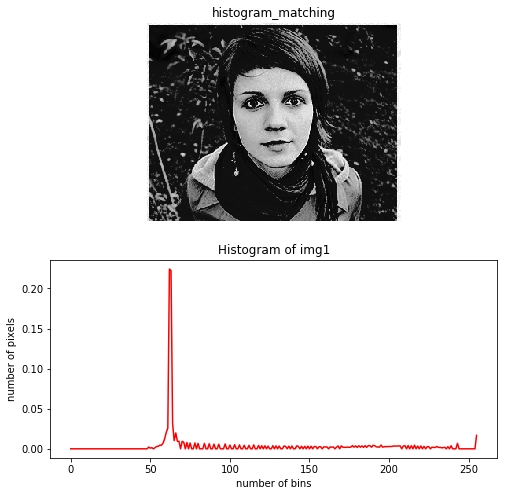

In [56]:
img1 = cv2.imread('../input_data/hist-match-1.jpg',0)
img2 = cv2.imread('../input_data/hist-match-2.jpg',0)
hist_match_img = histogram_matching(img1,img2)

## PLOTTING all HISTOGRAM FOR VERIFICATION
histo1 = histogram_1(img1,256,True)
histo2 = histogram_1(img2,256,True)
histo3 = histogram_1(hist_match_img,256,True)

fig=plt.figure(figsize=(8, 8))
columns = 1
rows = 2
fig.add_subplot(rows, columns, 1)
plt.axis("off")
plt.title("histogram_matching")
plt.imshow(hist_match_img,cmap='gray')


fig.add_subplot(rows, columns, 2)
plt.title("Histogram of img1")
plt.xlabel("number of bins")
plt.ylabel("number of pixels")
plt.plot(histo1[0,:],'r')
plt.show()




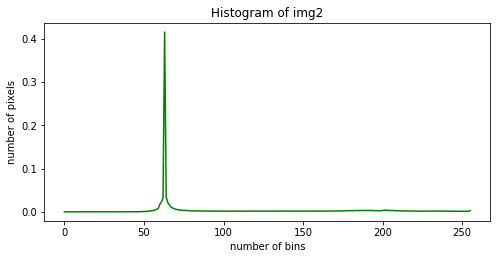

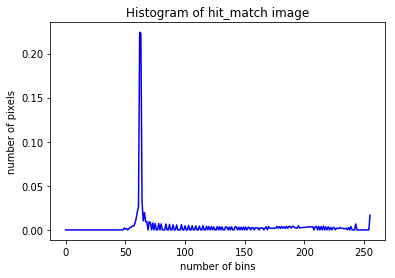

In [57]:
fig=plt.figure(figsize=(8, 8))
columns = 1
rows = 2
fig.add_subplot(rows, columns, 1)
plt.title("Histogram of img2")
plt.xlabel("number of bins")
plt.ylabel("number of pixels")
plt.plot(histo2[0,:],'g')
plt.show()
fig.add_subplot(rows, columns, 2)
plt.title("Histogram of hit_match image")
plt.xlabel("number of bins")
plt.ylabel("number of pixels")
plt.plot(histo3[0,:],'b')
plt.show()

#### Q6 Write a function BitQuantizeImage which takes an 8-bit image im and k, the number of bits to which the image needs to be quantized to and returns the k-bit quantized image

In [26]:
def BitQuantizeImage(img_gray, k):
    [row,col] = img_gray.shape
    out_img = np.zeros([row,col],dtype='uint8')
    
    if((k >0 ) & (k < 9)):
        factor  = 2.0**k-1

        for i in range(0,row):
            for j in range(0,col):
                value = img_gray[i,j]
                ## taking care the value accoring to bins
                value = round(value*(factor/255.0))

                # change the value according to bits:

                value = int(round((value/factor)*255))

                out_img[i,j] = value
        return out_img          
    else:
        
        print("Error not a valid entry of k. k should be in between 1 to 8 ")
        return [] 
            
            
        
    
    

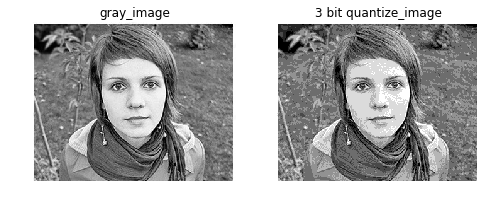

In [27]:
img_gray = cv2.imread('../input_data/hist-match-1.jpg',0)
quantize_image = BitQuantizeImage(img_gray, 3)
fig=plt.figure(figsize=(8, 8))
columns = 2
rows = 1
fig.add_subplot(rows, columns, 1)
plt.axis("off")
plt.title("gray_image")
plt.imshow(img_gray,cmap='gray')
fig.add_subplot(rows, columns, 2)
plt.axis("off")
plt.title("3 bit quantize_image")
plt.imshow(quantize_image,cmap='gray')


#### Q6.2 what is valid range of bits in n bit image ?

#### Ans Valid range will be 1 to n for n bit image

#### Q6.3 Ensure that the function BitQuantizeImage performs error-checking keeping the valid range of k in mind. (5 points)

#### Lets Check the function with invalid k entry like 0 or 10 

In [28]:
quantize_image = BitQuantizeImage(img_gray, 10)

Error not a valid entry of k. k should be in between 1 to 8 


In [29]:
quantize_image = BitQuantizeImage(img_gray, 0)

Error not a valid entry of k. k should be in between 1 to 8 


#### Q6.4 Display the image for all bits 

In [30]:
def display_quantize_image(img,k):
    fig=plt.figure(figsize=(16, 16))
    
    rows = k
    columns = 1
    for i in range(k):
        quantize_image = BitQuantizeImage(img, i+1)
        fig.add_subplot(rows, columns, i+1)
        plt.axis("off")
        plt.title(str (i+1)+ " bit quantize image")
        plt.imshow(quantize_image,cmap='gray')
        

        
        
        

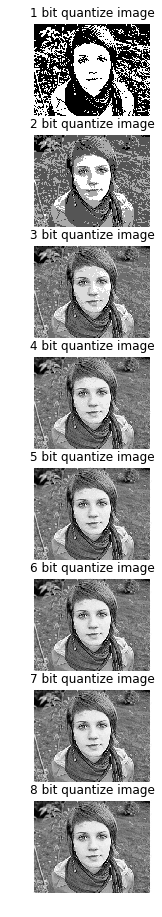

In [31]:
img_gray = cv2.imread('../input_data/hist-match-1.jpg',0)
display_quantize_image(img_gray,8)

#### Q7.  Choose 3 High Contrast and 3 Low Contrast Images of your choice and plot their histograms. Keep the resolution of all the images the same to compare adequately

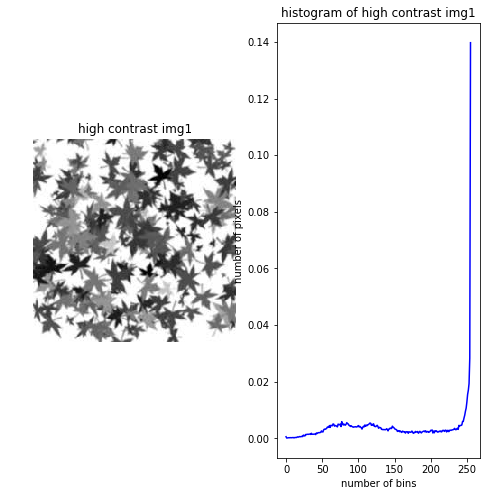

In [60]:
hc1 = cv2.imread('../input_data/hc1.jpeg',0)
hc1_hist = histogram_1(hc1,256,True)


fig=plt.figure(figsize=(8, 8))
columns = 2
rows = 1
fig.add_subplot(rows, columns, 1)
plt.axis("off")
plt.title("high contrast img1")
plt.imshow(hc1,cmap='gray')

fig.add_subplot(rows, columns, 2)
plt.title("histogram of high contrast img1")
plt.xlabel("number of bins")
plt.ylabel("number of pixels")
plt.plot(hc1_hist[0,:],'b')
plt.show()




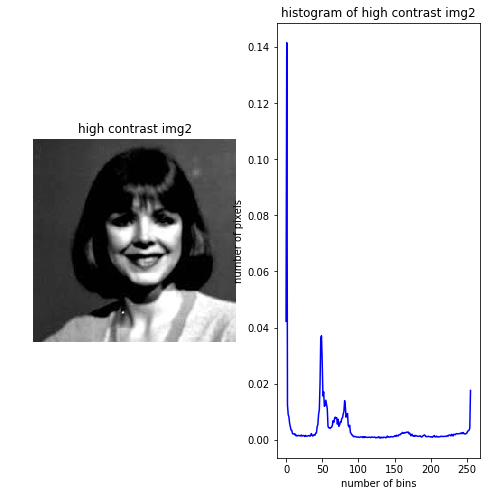

In [61]:
hc2 = cv2.imread('../input_data/hc2.jpeg',0)
hc2_hist = histogram_1(hc2,256,True)


fig=plt.figure(figsize=(8, 8))
columns = 2
rows = 1
fig.add_subplot(rows, columns, 1)
plt.axis("off")
plt.title("high contrast img2")
plt.imshow(hc2,cmap='gray')
fig.add_subplot(rows, columns, 2)

plt.title("histogram of high contrast img2")
plt.xlabel("number of bins")
plt.ylabel("number of pixels")
plt.plot(hc2_hist[0,:],'b')
plt.show()



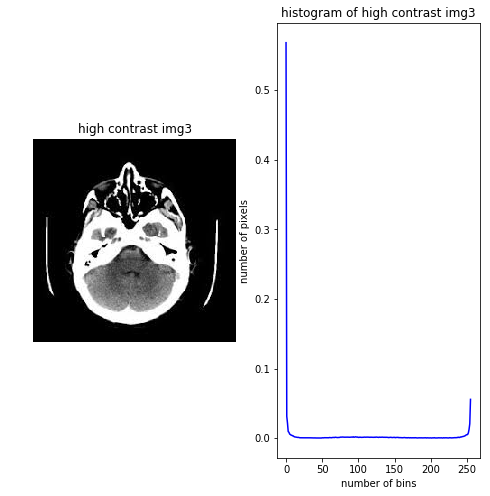

In [62]:
hc3 = cv2.imread('../input_data/hc3.jpeg',0)
hc3_hist = histogram_1(hc3,256,True)


fig=plt.figure(figsize=(8, 8))
columns = 2
rows = 1
fig.add_subplot(rows, columns, 1)
plt.axis("off")
plt.title("high contrast img3")
plt.imshow(hc3,cmap='gray')
fig.add_subplot(rows, columns, 2)

plt.title("histogram of high contrast img3")
plt.xlabel("number of bins")
plt.ylabel("number of pixels")
plt.plot(hc3_hist[0,:],'b')
plt.show()

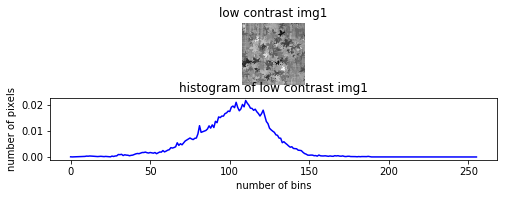

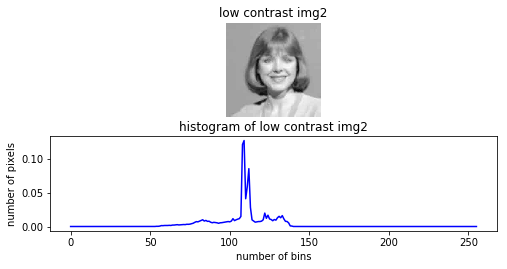

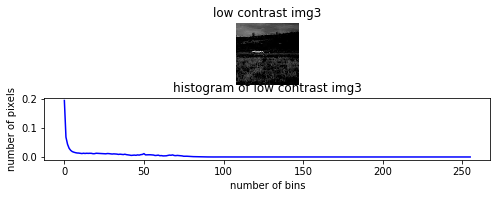

In [59]:
lc1 = cv2.imread('../input_data/lc1.jpeg',0)
lc1_hist = histogram_1(lc1,256,True)


fig=plt.figure(figsize=(8, 8))
columns = 2
rows = 1
fig.add_subplot(rows, columns, 1)
plt.axis("off")
plt.title("low contrast img1")
plt.imshow(lc1,cmap='gray')
fig.add_subplot(rows, columns, 2)

plt.title("histogram of low contrast img1")
plt.xlabel("number of bins")
plt.ylabel("number of pixels")
plt.plot(lc1_hist[0,:],'b')
plt.show()




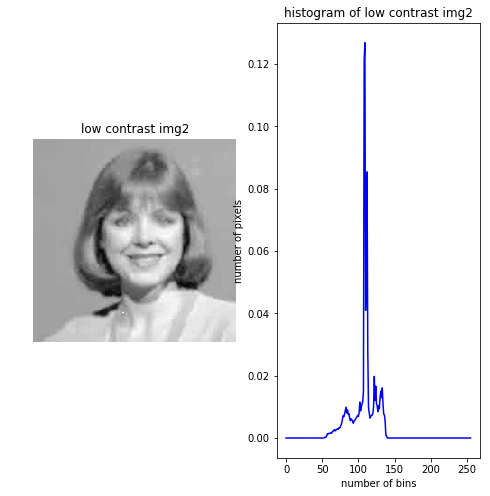

In [63]:
lc2 = cv2.imread('../input_data/lc2.jpeg',0)
lc2_hist = histogram_1(lc2,256,True)


fig=plt.figure(figsize=(8, 8))
columns = 2
rows = 1
fig.add_subplot(rows, columns, 1)
plt.axis("off")
plt.title("low contrast img2")
plt.imshow(lc2,cmap='gray')
fig.add_subplot(rows, columns, 2)

plt.title("histogram of low contrast img2")
plt.xlabel("number of bins")
plt.ylabel("number of pixels")
plt.plot(lc2_hist[0,:],'b')
plt.show()




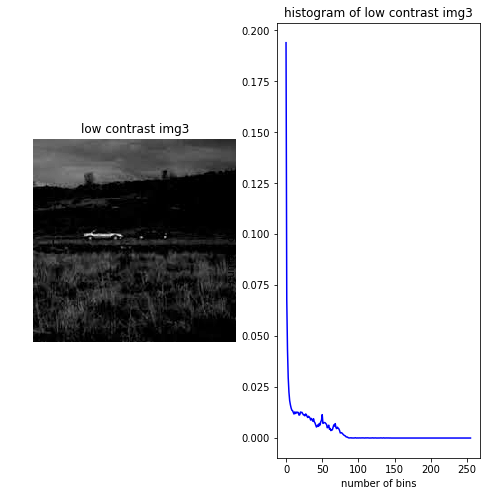

In [64]:
lc3 = cv2.imread('../input_data/lc3.jpeg',0)
lc3_hist = histogram_1(lc3,256,True)


fig=plt.figure(figsize=(8, 8))
columns = 2
rows = 1
fig.add_subplot(rows, columns, 1)
plt.axis("off")
plt.title("low contrast img3")
plt.imshow(lc3,cmap='gray')
fig.add_subplot(rows, columns, 2)

plt.title("histogram of low contrast img3")
plt.xlabel("number of bins")
plt.ylabel("number of pixels")
plt.plot(lc3_hist[0,:],'b')
plt.show()

#### Q8. Write code to display different bit planes of an 8-bit gray-scale image. Try this on various images. Which bit plane seems to have most information from original image

In [34]:
def bitplane_slicing(img_gray,num_bit):
    ## 
    [row,col] = img_gray.shape
    bit_img = np.zeros([row,col],'uint8')
    if(num_bit > 0) & (num_bit <9):
        for i in range(row):
            for j in range(col):
                
                value = img_gray[i,j]
                ## conver value for decimal to binary
                bit_value = format(value,'08b')
                
                in_value = int(bit_value[-num_bit])*255
                
                bit_img[i,j] = in_value
    else:
        
        print ("Error not a valid entry of num_bit. num_bit should be in between 1 to 8")


    return bit_img
    

In [35]:
def display_bit_images(img,k):
    fig=plt.figure(figsize=(16, 16))
    columns =1 
    rows = k
    
    for i in range(k):
        bit_image = bitplane_slicing(img, i+1)
        fig.add_subplot(rows, columns, i+1)
        plt.axis("off")
        plt.title(str (i+1)+ " bit plane image")
        plt.imshow(bit_image,cmap='gray')

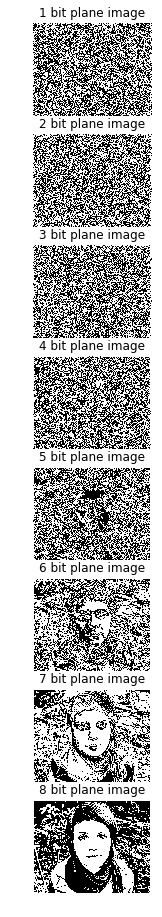

In [36]:
img_gray = cv2.imread('../input_data/hist-match-1.jpg',0)

display_bit_images(img_gray,8)



### Q9. Write a function for global threshold (Otsu) and adaptive threshold.

In [37]:
### helper function for Otsu
def get_cdf_class(histo,thre):
    cdf_1 = np.zeros([1,thre+1], dtype='float')
    cdf_2 = np.zeros([1,256-(thre+1)], dtype='float')
    IPI_1 = np.zeros([1,thre+1], dtype='float')
    IPI_2 = np.zeros([1,256-(thre+1)], dtype='float')
    
    temp_cdf = 0
    
    for k in range(0,thre+1):
        
        temp = histo[0,k]
        temp_cdf = temp_cdf+temp
        cdf_1[0,k] = temp_cdf
        IPI_1[0,k] = temp_cdf*k
        temp_cdf = 0
        
    temp_cdf = 0
    count = 0
    for m in range(thre+1,256):
        
        temp = histo[0,m]
        temp_cdf = temp_cdf+temp
        cdf_2[0,count] = temp_cdf
        IPI_2[0,count] = temp_cdf*m
        count = count+1
        
    return cdf_1[0,-1], cdf_2[0,-1], IPI_1[0,-1]/cdf_1[0,-1] , IPI_2[0,-1]/cdf_2[0,-1]

In [38]:
def Otsu_thre(img_gray):
    histo = histogram_1(img_gray,256,True)
    
    q1 = np.zeros([1,256], dtype='float')
    q2 = np.zeros([1,256], dtype='float')
    mean1 = np.zeros([1,256], dtype='float')
    mean2 = np.zeros([1,256], dtype='float')
    variance1 = np.zeros([1,256], dtype='float')
    variance2 = np.zeros([1,256], dtype='float')
    qw = np.zeros([1,255], dtype='float')
    [row,col] = img_gray.shape
    otsu_img = np.zeros([row,col], dtype='uint8')
    ## let assume the threshold is thre
    for thre_1 in range(0,255):
        
       
        q1[0,thre_1],q2[0,thre_1],mean1[0,thre_1],mean2[0,thre_1]  = get_cdf_class(histo,thre_1)      
        
    for thre in range(0,255):
        value1 = 0
        for i in range(0,thre+1):
            
            temp_value1 = ((i-mean1[0,thre])**2) *histo[0,i]
            value1 = value1+temp_value1
        variance1[0,thre] = value1/q1[0,thre]
        value2 = 0
        for j in range(thre+1,256):
        
            temp_value2 = ((j-mean2[0,thre])**2) *histo[0,j]
            value2 = value2+temp_value2 
        variance2[0,thre] = value2/q2[0,thre]
        
        qw[0,thre] = (q1[0,thre]* variance1[0,thre]) + (q2[0,thre]* variance2[0,thre])
        
        
    otsu_thre = np.argmin(qw[0,:],axis=0)
    
    for i in range(row):
        for j in range(col):
        #print (img_gray[i,j])
            if(img_gray[i,j] >= otsu_thre):
            
                otsu_img[i,j] = 255
    
    return otsu_img, otsu_thre  
        
        
        
        
    
    

Otsu_thre =  144


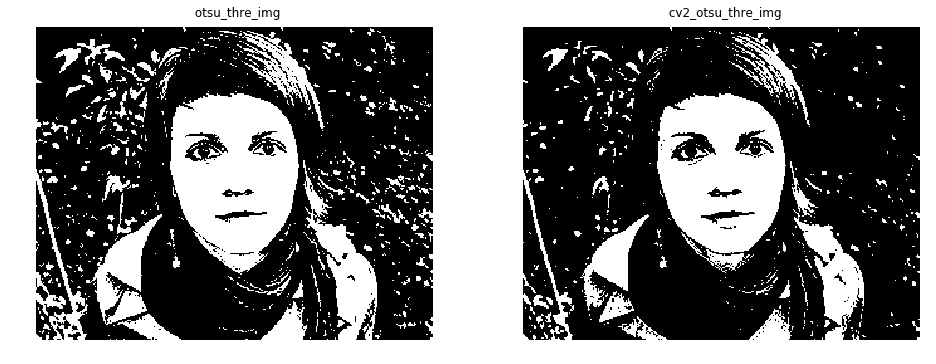

In [39]:
import cv2 as cv
img_gray = cv2.imread('../input_data/hist-match-1.jpg',0)
otsu_img, otsu_thre= Otsu_thre(img_gray)
[row,col] = img_gray.shape
#otsu_img = np.zeros([row,col], dtype='uint8')



print ("Otsu_thre = " ,otsu_thre)


    
    

ret, cv2_otsu_thre_img = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
fig=plt.figure(figsize=(16, 16))
columns =2 
rows = 1
fig.add_subplot(rows, columns, 1)
plt.axis("off")
plt.title(" otsu_thre_img")
plt.imshow(otsu_img,cmap='gray')
fig.add_subplot(rows, columns, 2)
plt.axis("off")
plt.title(" cv2_otsu_thre_img")
plt.imshow(cv2_otsu_thre_img,cmap='gray')

#th2

In [40]:
## helper function for adaptive thresholding
import math
def mode_select(window,mode):
    [h,w] = window.shape
    out_value = np.zeros([h,w],'uint8')
    window_1 = window.ravel()
    
    if (mode == 'mean_value'):
        
        thre_value = int(math.floor(np.mean(window_1)))
    if (mode == 'median_value' ):
        thre_value = int(math.floor(np.median(window_1)))
    else:
        thre_value = int(math.floor(np.mean(window_1)/2.0 + np.median(window_1)/2.0))
    
    
    for i in range(h):
        for j in range(w):
            if(window[i,j] >= thre_value):
                out_value[i,j] = 255
        
    #out_value[window[:,:] > thre_value] = 255    
    return out_value    
        
        

In [41]:
import math
def local_adaptive_thre(img, window_size, mode):
    [rows,cols] = img.shape
    
    #out_img = np.ones([rows,cols],dtype='uint8')
    
    PadM=math.floor((window_size[0])/2)
    PadN=math.floor((window_size[1])/2)
    pad_img = []
    ##FIND THE NUMBER OF ROWS AND COLUMNS TO BE PADDED WITH ZERO

    #print (PadM,PadN)
    pad_img = np.pad(img,[PadM,PadN],'constant', constant_values=(0, 0))
    [rows1,cols1] = pad_img.shape
    out_img = np.zeros([rows1,cols1],dtype='uint8')
    #print (pad_img.shape)
    
    for i in range(PadM,rows1-PadM,window_size[0]):
        for j in range(PadN,cols1-PadN,window_size[1]):
            
            # get the PadMxPadN windows
            window = pad_img[i-PadM:i+PadM+1,j-PadN:j+PadN+1]
           
            
            thre_window = mode_select(window,mode)
            #print(thre_window)
            #if(img[i-PadM,j-PadN] < thre_window):
            #    out_img[i-PadM,j-PadN] = 0
                
                
                
            out_img[i-PadM:i+PadM+1,j-PadN:j+PadN+1] = thre_window
    return out_img        
            
    
    

#### check the local daptive thre result 

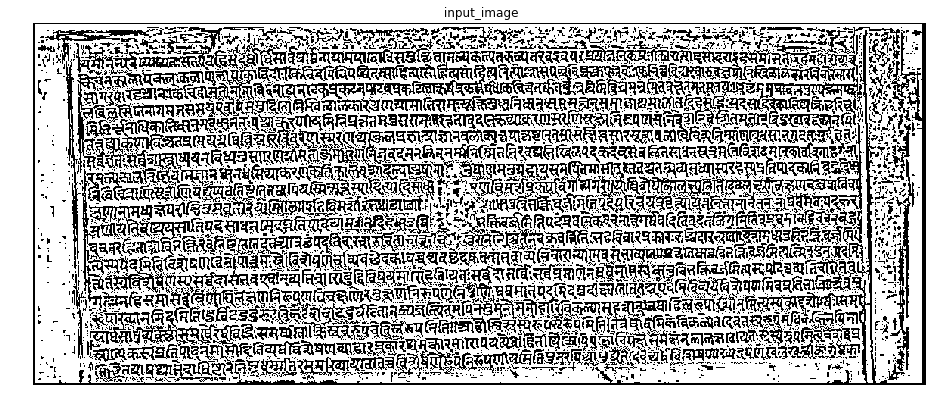

In [42]:
img_gray = cv2.imread('../input_data/palm-leaf-2.jpg',0)
local_bin_image = local_adaptive_thre(img_gray, (7,7), 'mean_value')




fig=plt.figure(figsize=(16, 16))
columns =1 
rows = 1
fig.add_subplot(rows, columns, 1)
plt.axis("off")
plt.title(" input_image")
plt.imshow(local_bin_image,cmap='gray')





#### Q 9.2 write a Otsu for RGB function which take care the RGB images and apply Otsu thresholding 

In [43]:
def otsu_main(img):
    
         #check the image is gray or RGB
    if(len(img.shape)>2):
        print("RGB image")    
        rows,cols,channel = img.shape
        img_out = np.zeros([rows,cols],'uint8')
        ## convert RGB image to gray  (Clinear = 0.2126 R + 0.7152 G + 0.0722 B)
        img_gray = np.round(.0722 * img[:,:,0] + .7152 * img[:,:,1] + .2126 * img[:,:,2])
        img_gray = img_gray.astype('uint8')
        img_out,thre =  Otsu_thre(img_gray)
        
    else:
        rows,cols = img.shape
        print ("gray Image")
        img_out = np.zeros([rows,cols],'uint8')
        img_out,thre =  Otsu_thre(img)
    fig=plt.figure(figsize=(16, 16))
    columns =2 
    rows = 1
    fig.add_subplot(rows, columns, 1)
    plt.axis("off")
    plt.title("input_img")
    plt.imshow(img)
    fig.add_subplot(rows, columns, 2)
    plt.axis("off")
    plt.title(" otsu_thre_img")
    plt.imshow(img_out,cmap='gray')
    
    
    
    
    

RGB image


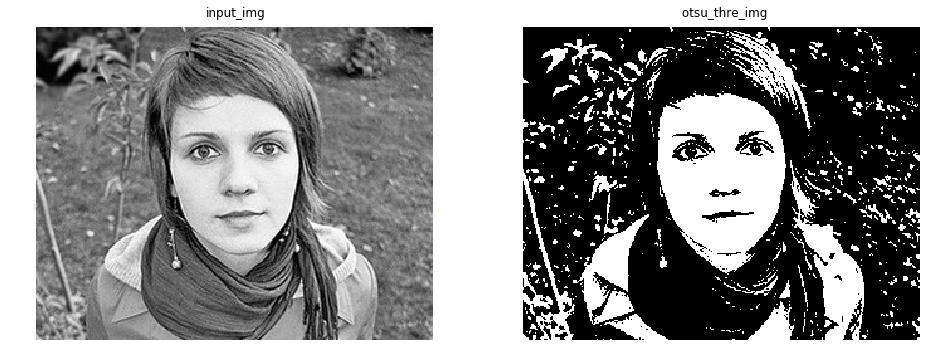

In [44]:
img = cv2.imread('../input_data/hist-match-1.jpg')
otsu_main(img)

#### Q9.2 write a local adaptive thresholding, RGB function which take care the RGB images and apply local adaptive thresholding

In [45]:
def local_adaptive_main(img,window,mode):
    
    if(len(img.shape)>2):
        print("RGB image")    
        rows,cols,channel = img.shape
        img_out = np.zeros([rows,cols],'uint8')
        ## convert RGB image to gray  (Clinear = 0.2126 R + 0.7152 G + 0.0722 B)
        img_gray = np.round(.0722 * img[:,:,0] + .7152 * img[:,:,1] + .2126 * img[:,:,2])
        img_gray = img_gray.astype('uint8')
        img_out =  local_adaptive_thre(img_gray,window,mode)
        
    else:
        rows,cols = img.shape
        print ("gray Image")
        img_out = np.zeros([rows,cols],'uint8')
        img_out =  local_adaptive_thre(img,window,mode)
    fig=plt.figure(figsize=(16, 16))
    columns =2 
    rows = 1
    fig.add_subplot(rows, columns, 1)
    plt.axis("off")
    plt.title("input_img")
    plt.imshow(img)
    fig.add_subplot(rows, columns, 2)
    plt.axis("off")
    plt.title(" local_thre_img")
    plt.imshow(img_out,cmap='gray')

RGB image


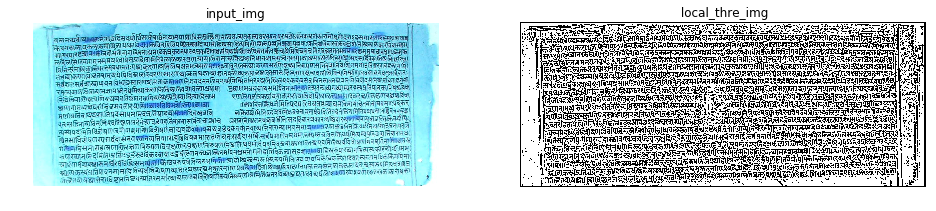

In [46]:
img = cv2.imread('../input_data/palm-leaf-2.jpg')
local_bin_image = local_adaptive_main(img, (7,7), 'mean_value')

#### Q9.1 

gray Image
gray Image


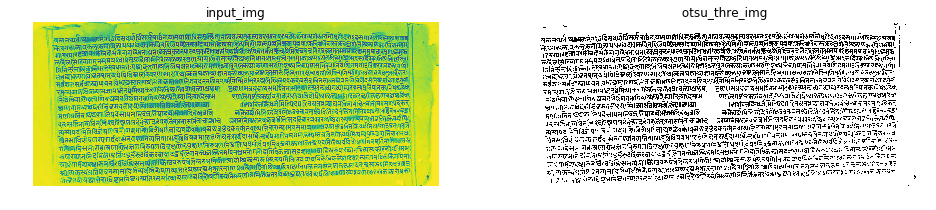

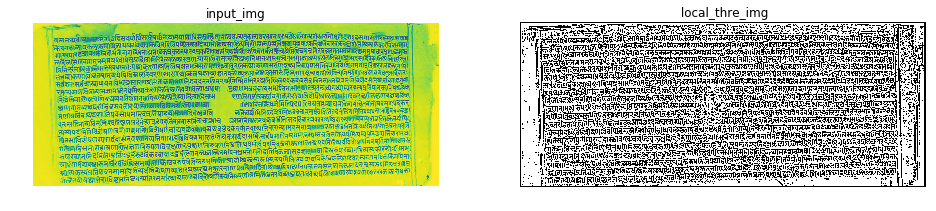

In [47]:
### comapre the result with global thre and local thre

img = cv2.imread('../input_data/palm-leaf-2.jpg',0)
otsu_main(img)
local_bin_image = local_adaptive_main(img, (7,7), 'mean_value')

#### Ans 9.3  :  
The function we implemented for local adaptive thresholding we can change window size for neighborwood pixels it have three modes mean_value midean_value and min+ mideian_value for selecting the threshold of window . 
